# EDA Project Felix Kolodziej 14.06.2024 - 19.06.2024
Client:
* Nicole Johnson | Buyer | Lively, central neighborhood, middle price range, right timing (within a year)

### Importing relevant library's 

In [175]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import altair as alt

# This line imports the PercentFormatter class from the matplotlib.ticker module. PercentFormatter is used to format axis tick labels as percentages.
from matplotlib.ticker import PercentFormatter

# This line updates the default configuration parameters (rcParams) for Matplotlib plots. 
# Specifically, it sets:
# * figure.figsize to (8, 5): This sets the default size of the figures to 8 inches in width and 5 inches in height.
# * axes.facecolor to white: This sets the background color of the plot axes to white.
# * axes.edgecolor to black: This sets the color of the edges of the plot axes to black.
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})

# This line sets the default background color of the entire figure to white (using "w" as the color code).
plt.rcParams["figure.facecolor"]= "w"

# This line registers the converters provided by pandas.
# plotting with Matplotlib, ensuring that Pandas objects, such as DatetimeIndex, are properly converted for plotting.
pd.plotting.register_matplotlib_converters()

# This line sets the display format for floating-point numbers in Pandas DataFrames and Series to display
# three decimal places. The lambda x: '%.3f' % x function formats the floating-point numbers accordingly.
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Overall, this code configures Matplotlib and Pandas to ensure consistent plotting aesthetics and data formatting for floating-point numbers.

### importing raw data

In [176]:
df_details = pd.read_csv('data\king_county_house_details_202406141310.csv')
df_sales = pd.read_csv('data\king_county_house_sales_202406141310.csv')

## Overview of the Dataframes

In [177]:
print("Details: ", df_details.shape)
print("Sales: ", df_sales.shape)
df_details.head(25)

Details:  (21420, 19)
Sales:  (21597, 4)


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000
1,100100050,3.000,1.000,1320.000,11090.000,1.000,0.000,0.000,3,7,1320.000,0.000,1955,0.000,98155,47.775,-122.304,1320.000,8319.000
2,1001200035,3.000,1.000,1350.000,7973.000,1.500,NaN,0.000,3,7,1350.000,0.000,1954,0.000,98188,47.432,-122.292,1310.000,7491.000
3,1001200050,4.000,1.500,1260.000,7248.000,1.500,NaN,0.000,5,7,1260.000,0.000,1955,NaN,98188,47.433,-122.292,1300.000,7732.000
4,1003000175,3.000,1.000,980.000,7606.000,1.000,0.000,0.000,3,7,980.000,0.000,1954,0.000,98188,47.436,-122.290,980.000,8125.000
5,100300280,3.000,2.250,1430.000,4777.000,2.000,0.000,0.000,3,7,1430.000,0.000,2010,0.000,98059,47.487,-122.152,1639.000,3854.000
6,100300500,3.000,2.500,1520.000,3041.000,2.000,0.000,0.000,3,7,1520.000,0.000,2009,NaN,98059,47.487,-122.152,1820.000,3229.000
7,100300530,3.000,2.500,1520.000,3003.000,2.000,0.000,0.000,3,7,1520.000,0.000,2009,0.000,98059,47.488,-122.153,1820.000,3030.000
8,1003400155,3.000,1.000,1100.000,7657.000,1.000,0.000,0.000,3,7,1100.000,0.000,1955,0.000,98188,47.437,-122.285,1300.000,8000.000
9,1003400245,3.000,1.000,1130.000,9907.000,1.000,0.000,0.000,3,7,1130.000,0.000,1954,0.000,98188,47.436,-122.286,1320.000,9907.000


here i have the following to dos:
* change id to index
* change bedrooms/bathrooms to int
* round floors to 2 dgts
* investigate view
* check yr_renovated. maybe change renovated to not needed, if house in good condition or was build only few yrs ago
* take care of NaN
* merge sales with details on house_id
*see, what to do about the 177 missing houses

In [178]:
df_sales.head(25)

,date,price,house_id,id
0,2014-10-13,221900.000,7129300520,1
1,2014-12-09,538000.000,6414100192,2
2,2015-02-25,180000.000,5631500400,3
3,2014-12-09,604000.000,2487200875,4
4,2015-02-18,510000.000,1954400510,5
5,2014-05-12,1230000.000,7237550310,6
6,2014-06-27,257500.000,1321400060,7
7,2015-01-15,291850.000,2008000270,8
8,2015-04-15,229500.000,2414600126,9
9,2015-03-12,323000.000,3793500160,10


here i can change id to index
* merge sales with details on house_id, change index not needed, can pop id

## Data Cleaning

### Merging sales.house_id ON details.id  

In [179]:
# Perform the left join
df = pd.merge(df_details, df_sales, how='left', left_on='id', right_on='house_id')

In [180]:
df.head(25)

,id_x,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id_y
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,...,0.000,98002,47.326,-122.214,2060.000,7316.000,2014-09-16,280000.000,1000102,2495
1,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,...,0.000,98002,47.326,-122.214,2060.000,7316.000,2015-04-22,300000.000,1000102,2496
2,100100050,3.000,1.000,1320.000,11090.000,1.000,0.000,0.000,3,7,...,0.000,98155,47.775,-122.304,1320.000,8319.000,2014-11-12,275000.000,100100050,7320
3,1001200035,3.000,1.000,1350.000,7973.000,1.500,NaN,0.000,3,7,...,0.000,98188,47.432,-122.292,1310.000,7491.000,2015-03-06,272450.000,1001200035,13278
4,1001200050,4.000,1.500,1260.000,7248.000,1.500,NaN,0.000,5,7,...,NaN,98188,47.433,-122.292,1300.000,7732.000,2014-09-23,259000.000,1001200050,15529
5,1003000175,3.000,1.000,980.000,7606.000,1.000,0.000,0.000,3,7,...,0.000,98188,47.436,-122.290,980.000,8125.000,2014-12-22,221000.000,1003000175,14057
6,100300280,3.000,2.250,1430.000,4777.000,2.000,0.000,0.000,3,7,...,0.000,98059,47.487,-122.152,1639.000,3854.000,2014-10-20,355000.000,100300280,21277
7,100300500,3.000,2.500,1520.000,3041.000,2.000,0.000,0.000,3,7,...,NaN,98059,47.487,-122.152,1820.000,3229.000,2014-11-21,333000.000,100300500,20282
8,100300530,3.000,2.500,1520.000,3003.000,2.000,0.000,0.000,3,7,...,0.000,98059,47.488,-122.153,1820.000,3030.000,2014-09-25,330000.000,100300530,21460
9,1003400155,3.000,1.000,1100.000,7657.000,1.000,0.000,0.000,3,7,...,0.000,98188,47.437,-122.285,1300.000,8000.000,2014-08-11,233000.000,1003400155,13519


After merging, I drop id_x & id_y and set house_id to new index 

In [181]:
df.drop('id_x', axis=1, inplace=True)
df.drop('id_y', axis=1, inplace=True)
df.set_index('house_id', inplace=True)
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
house_id,,,,,,,,,,,,,,,,,,,,
1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000,2014-09-16,280000.000
1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000,2015-04-22,300000.000
100100050,3.000,1.000,1320.000,11090.000,1.000,0.000,0.000,3,7,1320.000,0.000,1955,0.000,98155,47.775,-122.304,1320.000,8319.000,2014-11-12,275000.000
1001200035,3.000,1.000,1350.000,7973.000,1.500,NaN,0.000,3,7,1350.000,0.000,1954,0.000,98188,47.432,-122.292,1310.000,7491.000,2015-03-06,272450.000
1001200050,4.000,1.500,1260.000,7248.000,1.500,NaN,0.000,5,7,1260.000,0.000,1955,NaN,98188,47.433,-122.292,1300.000,7732.000,2014-09-23,259000.000


### Change Data for Visibility

changing bathrooms and bedrooms to int, changing the display option for 'floors' to 1 decimal 
remove 0 from yr_renovated, simply by dividing by 10

In [182]:
#df[['bathrooms', 'bedrooms']] = df[['bathrooms', 'bedrooms']].astype(int)
#df['floors'] = df['floors'].apply(lambda x: '{:.1f}'.format(x))
df['yr_renovated'] = df['yr_renovated'] // 10
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
house_id,,,,,,,,,,,,,,,,,,,,
1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000,2014-09-16,280000.000
1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000,2015-04-22,300000.000
100100050,3.000,1.000,1320.000,11090.000,1.000,0.000,0.000,3,7,1320.000,0.000,1955,0.000,98155,47.775,-122.304,1320.000,8319.000,2014-11-12,275000.000
1001200035,3.000,1.000,1350.000,7973.000,1.500,NaN,0.000,3,7,1350.000,0.000,1954,0.000,98188,47.432,-122.292,1310.000,7491.000,2015-03-06,272450.000
1001200050,4.000,1.500,1260.000,7248.000,1.500,NaN,0.000,5,7,1260.000,0.000,1955,NaN,98188,47.433,-122.292,1300.000,7732.000,2014-09-23,259000.000


### Checking NaN-Values

<Axes: >

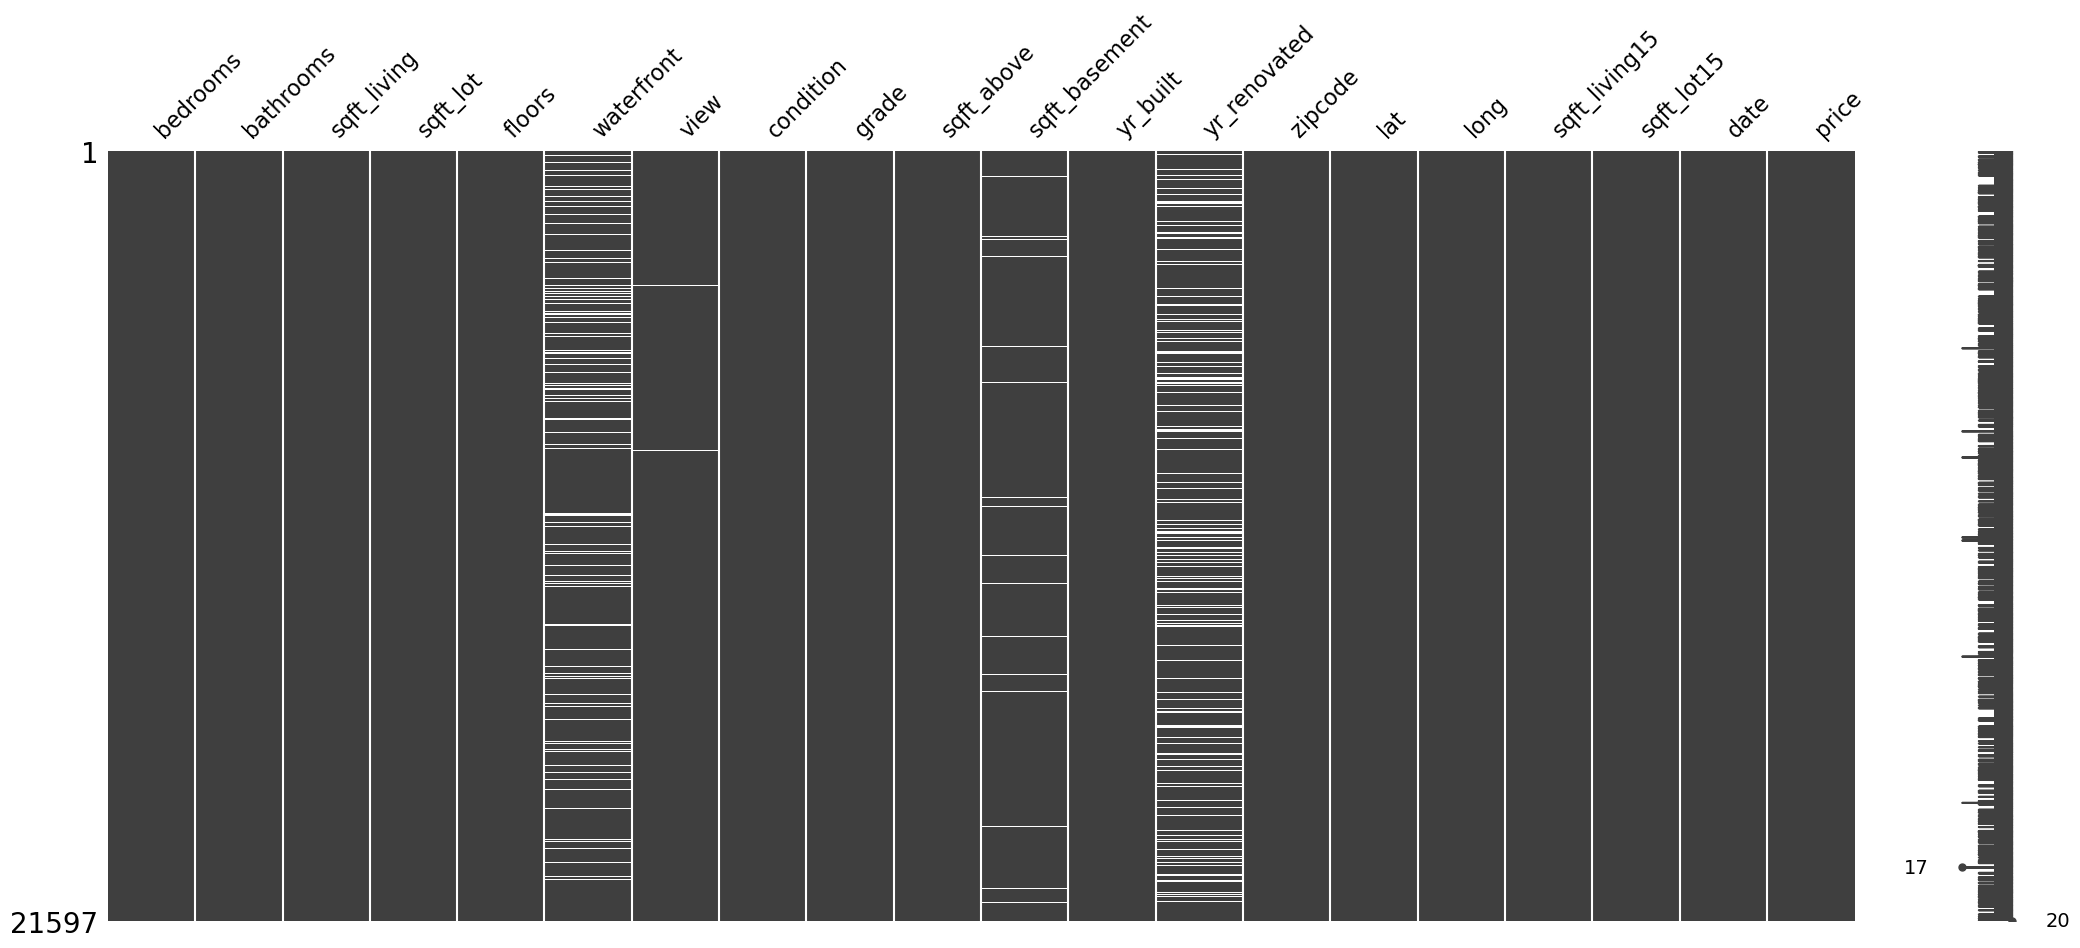

In [183]:
msno.matrix(df)

Checking how 'view' gets affected by 'waterfront'

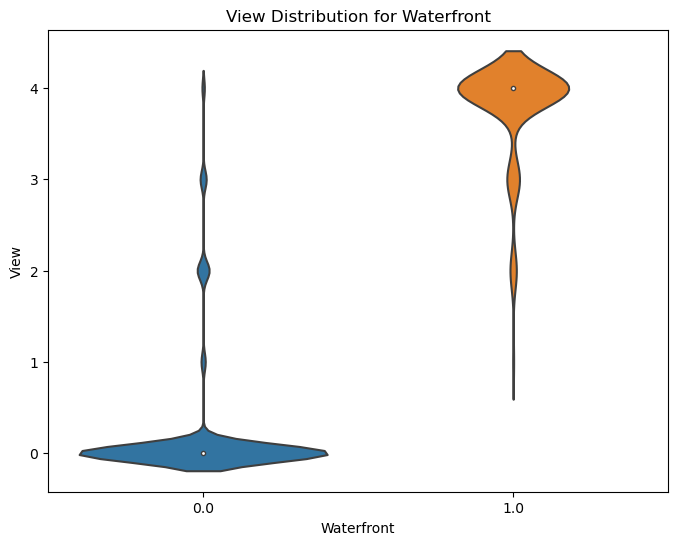

In [184]:
# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='waterfront', y='view', data=df)
plt.title('View Distribution for Waterfront')
plt.xlabel('Waterfront')
plt.ylabel('View')
plt.show()

My Hypotithis is, that view only reaches 3+, if the House has a waterfront. Due to that, I will assign every NaN from waterfront a 

### Reducing NaN Values

#### View

If View is 4, set Waterfront to 1.
If View is lower than 4, set Waterfront to 0 

In [185]:
df.loc[(df['view'] == 4) & (df['waterfront'].isna()), 'waterfront'] = 1
df.loc[(df['view'] < 4) & (df['waterfront'].isna()), 'waterfront'] = 0

<Axes: >

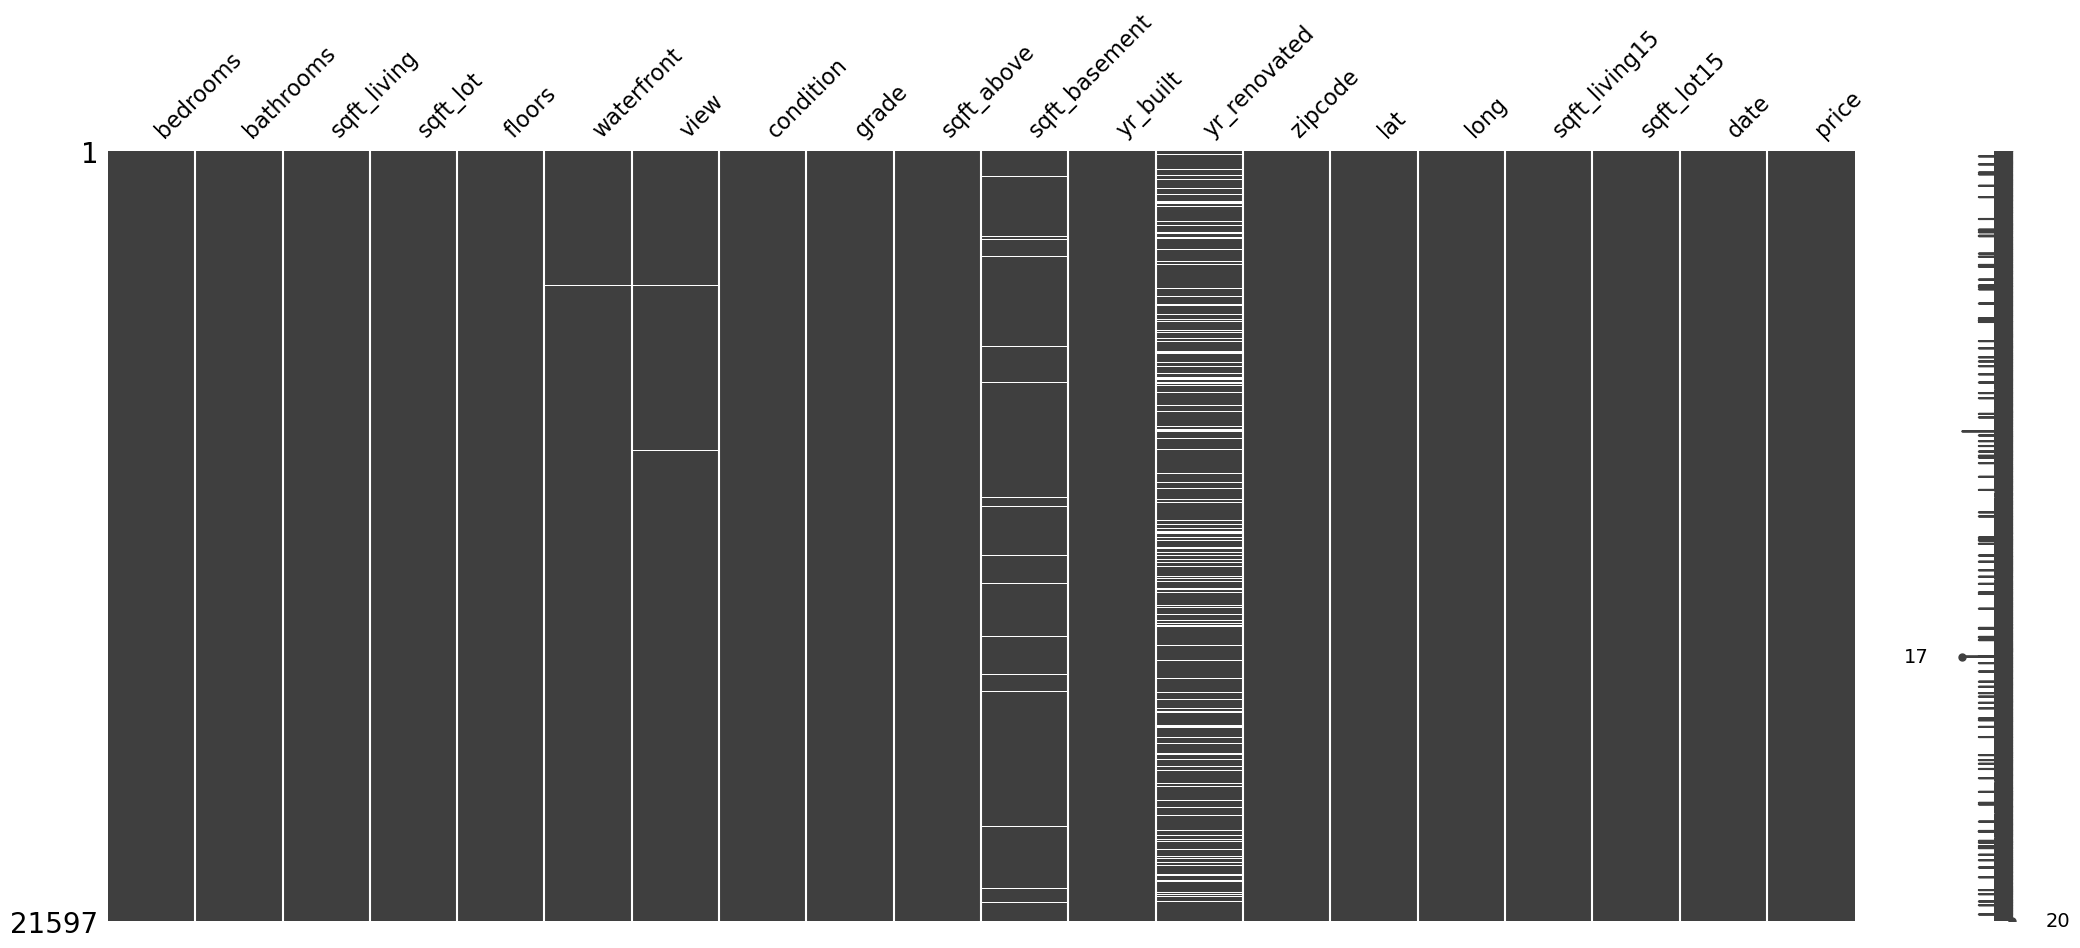

In [186]:
msno.matrix(df)

Set View to 4 if Waterfront is 1
Set View to 0 if Waterfront is 0

In [187]:
df.loc[(df['waterfront'] == 1) & (df['view'].isna()), 'view'] = 4

In [188]:
df.loc[(df['waterfront'] == 0) & (df['view'].isna()), 'view'] = 0

In [189]:
df[df['view'].isna()]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
house_id,,,,,,,,,,,,,,,,,,,,
2162000190,3.000,2.250,2120.000,13644.000,2.000,NaN,NaN,4,9,1420.000,700.000,1973,0.000,98040,47.557,-122.214,2950.000,17060.000,2014-12-15,693000.000
2338800161,2.000,1.000,1390.000,8336.000,1.000,NaN,NaN,4,6,910.000,480.000,1946,0.000,98166,47.465,-122.361,1610.000,7847.000,2015-01-06,365000.000
339200130,3.000,2.500,2460.000,12028.000,2.000,NaN,NaN,3,9,2460.000,0.000,1996,NaN,98052,47.691,-122.095,2540.000,12229.000,2014-05-31,693000.000
3423600060,4.000,1.750,2280.000,3680.000,1.500,NaN,NaN,5,7,1470.000,810.000,1926,0.000,98115,47.675,-122.300,1850.000,3680.000,2014-12-02,665000.000
5700003630,5.000,4.250,4830.000,8050.000,2.500,NaN,NaN,4,11,3710.000,1120.000,1914,0.000,98144,47.579,-122.286,4470.000,9194.000,2014-06-30,1930000.000
6669240230,3.000,2.500,2588.000,5702.000,2.000,NaN,NaN,3,8,2588.000,0.000,2008,NaN,98042,47.345,-122.151,2403.000,5703.000,2015-03-17,306000.000


For these 6 Entries, I manually set the value, by checking Google Maps 

In [190]:
# Update 'view' and 'waterfront' for specified house_ids
house_ids_to_update = [339200130, 3423600060, 6669240230]
df.loc[house_ids_to_update, 'view'] = 2
df.loc[house_ids_to_update, 'waterfront'] = 0

In [191]:
# Update 'view' and 'waterfront' for specified house_ids
house_ids_to_update = [2162000190, 2338800161, 5700003630]
df.loc[house_ids_to_update, 'view'] = 4
df.loc[house_ids_to_update, 'waterfront'] = 1

#### Year Renovated

Checking Correlation between Year Build vs Year renovated

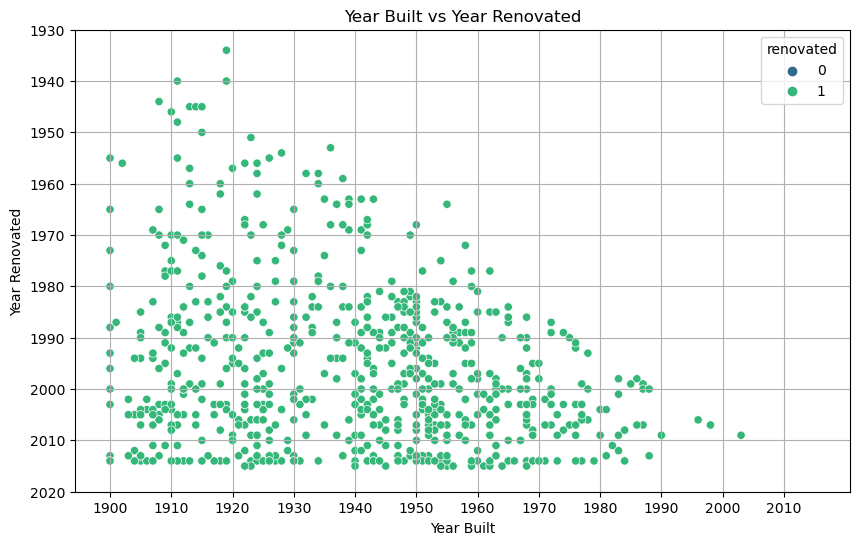

In [192]:
# Preprocess data to mark if a building was renovated
df['renovated'] = df['yr_renovated'].apply(lambda x: 0 if pd.isna(x) or x == 0 else 1)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='yr_built', y='yr_renovated', hue='renovated', palette='viridis', legend='full')
plt.xlabel('Year Built')
plt.ylabel('Year Renovated')
plt.title('Year Built vs Year Renovated')
plt.grid(True)

# Adjust y-axis scale
plt.ylim(max(df['yr_renovated']), min(df['yr_renovated']) - 5)  # Set y-axis limits
plt.ylim(2020, 1930)  # Set y-axis limits

# Adjust x-axis scale
plt.xticks(range(int(min(df['yr_built'])), int(max(df['yr_built'])) + 1, 10))  # Set x-axis ticks every 10 years

plt.show()

## Gathering Data for Client

Nicole Johnson | Buyer | Lively, central neighborhood, middle price range, right timing (within a year)

Grade = 7 or Higher
Price = around 450000
Timing = When House-Prices are lower
central Neighborhood


In [193]:
df['price'].median()

450000.0

* Define Boundaries for lively neighborhoods and create Column that states if in one or 'Else', if not.
* create 2 plots, one for all entries in map and one for all entries in filtered neighborhood.

In [194]:
from data.secret import API
from gmplot import gmplot

# Define lively neighborhoods boundaries
lively_neighborhoods_boundaries = {
    'Downtown': {'lat_min': 47.601, 'lat_max': 47.615, 'lon_min': -122.340, 'lon_max': -122.320},
    'Capitol Hill': {'lat_min': 47.620, 'lat_max': 47.640, 'lon_min': -122.330, 'lon_max': -122.300},
    'Belltown': {'lat_min': 47.610, 'lat_max': 47.620, 'lon_min': -122.350, 'lon_max': -122.330},
    'First Hill': {'lat_min': 47.605, 'lat_max': 47.620, 'lon_min': -122.330, 'lon_max': -122.310},
    'South Lake Union': {'lat_min': 47.625, 'lat_max': 47.645, 'lon_min': -122.350, 'lon_max': -122.320},
    'Pioneer Square': {'lat_min': 47.595, 'lat_max': 47.605, 'lon_min': -122.340, 'lon_max': -122.325},
    'Ballard': {'lat_min': 47.665, 'lat_max': 47.685, 'lon_min': -122.390, 'lon_max': -122.370},
    'Fremont': {'lat_min': 47.645, 'lat_max': 47.665, 'lon_min': -122.360, 'lon_max': -122.340},
    'Queen Anne': {'lat_min': 47.625, 'lat_max': 47.645, 'lon_min': -122.370, 'lon_max': -122.350},
    'University District': {'lat_min': 47.655, 'lat_max': 47.675, 'lon_min': -122.320, 'lon_max': -122.300}
}

# Function to determine the lively neighborhood based on latitude and longitude
def get_lively_neighborhood(lat, lon):
    for neighborhood, bounds in lively_neighborhoods_boundaries.items():
        if bounds['lat_min'] <= lat <= bounds['lat_max'] and bounds['lon_min'] <= lon <= bounds['lon_max']:
            return neighborhood
    return 'Else'

# Apply the function to create the 'live_nh' column
df['live_nh'] = df.apply(lambda row: get_lively_neighborhood(row['lat'], row['long']), axis=1)


# Initialize the map centered around the mean latitude and longitude
gmap_all = gmplot.GoogleMapPlotter(df['lat'].mean(), df['long'].mean(), 10, apikey= API)

# Plot all entrances
gmap_all.scatter(df['lat'], df['long'], '#FF0000', size=40, marker=True)

# Draw the map to an HTML file
gmap_all.draw("presentation/html/all_entries_map.html")


# Filter entrances within Queen Anne, Fremont, Ballard
filtered_df = df[df['live_nh'] != 'Else']

# Initialize the map centered around the mean latitude and longitude
gmap_lively = gmplot.GoogleMapPlotter(filtered_df['lat'].mean(), filtered_df['long'].mean(), 10, apikey= API)

# Plot entrances in lively neighborhoods
gmap_lively.scatter(filtered_df['lat'], filtered_df['long'], '#00FF00', size=40, marker=True)

# Draw the map to an HTML file
gmap_lively.draw("presentation/html/filtered_for_lively_neighborhoods_map.html")



* Create Chart that filters for Average House Prices per Month where Grade is 7 or higher
* Create Chart that filters for Average number of Houses sold per Month where Grade is 7 or higher

The month with the lowest average prices for houses around $450,000 is: 2
The average number of houses sold in this month per year is: 2


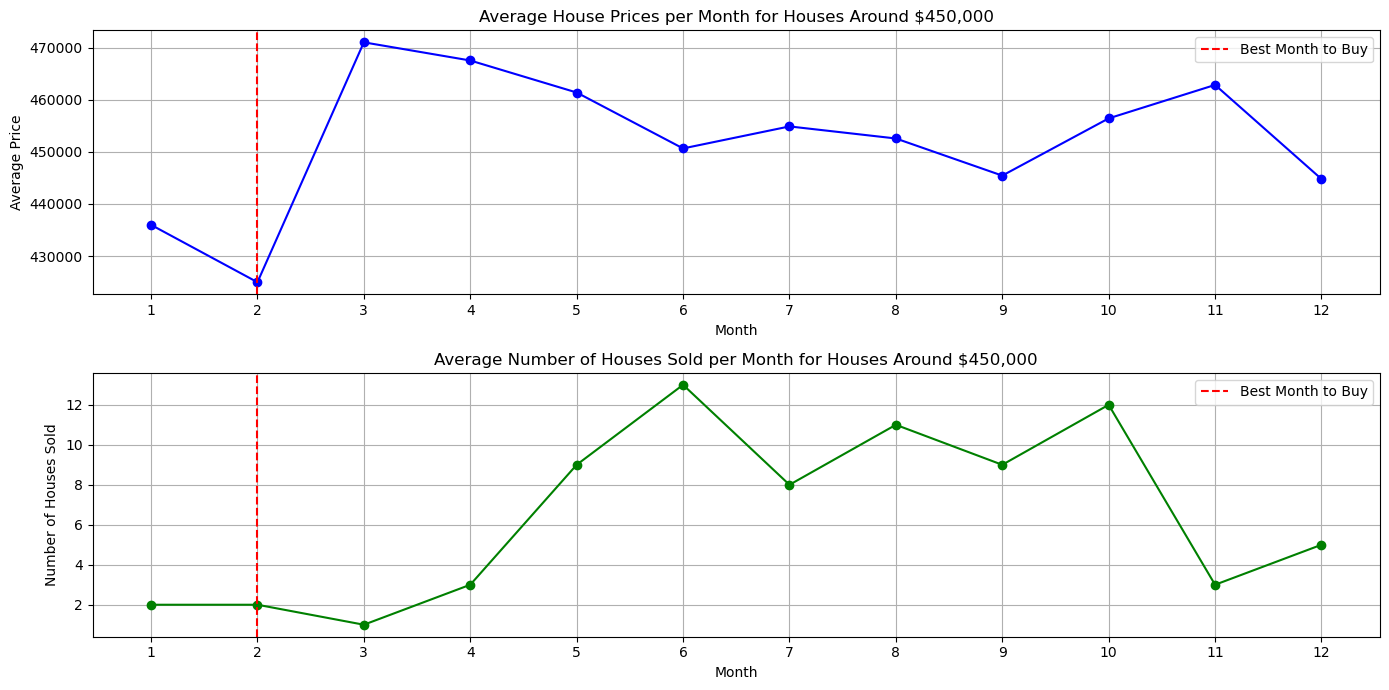

In [195]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

# Define price range
price_min = 425000
price_max = 475000

# Filter the dataset for houses around $450,000 and with grade 7 or higher
filtered_df = df[(df['price'] >= price_min) & (df['price'] <= price_max) & (df['grade'] >= 7) & (df['live_nh'] != 'Else')]

# Group by month to find the average price and average number of houses sold for filtered data
monthly_avg_price_filtered = filtered_df.groupby('month')['price'].mean()
monthly_houses_sold_filtered = filtered_df.groupby('month').size()

# Find the month with the lowest average price for filtered data
lowest_avg_price_month_filtered = monthly_avg_price_filtered.idxmin()

print(f"The month with the lowest average prices for houses around $450,000 is: {lowest_avg_price_month_filtered}")
print(f"The average number of houses sold in this month per year is: {monthly_houses_sold_filtered[lowest_avg_price_month_filtered]}")

# Plot average prices and number of houses sold per month for filtered data
plt.figure(figsize=(14, 7))

# Plot average house prices for filtered data
plt.subplot(2, 1, 1)
plt.plot(monthly_avg_price_filtered.index, monthly_avg_price_filtered.values, marker='o', linestyle='-', color='b')
plt.axvline(x=lowest_avg_price_month_filtered, color='r', linestyle='--', label='Best Month to Buy')
plt.title('Average House Prices per Month for Houses Around $450,000')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)

# Plot average number of houses sold for filtered data
plt.subplot(2, 1, 2)
plt.plot(monthly_houses_sold_filtered.index, monthly_houses_sold_filtered.values, marker='o', linestyle='-', color='g')
plt.axvline(x=lowest_avg_price_month_filtered, color='r', linestyle='--', label='Best Month to Buy')
plt.title('Average Number of Houses Sold per Month for Houses Around $450,000')
plt.xlabel('Month')
plt.ylabel('Number of Houses Sold')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)

plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("presentation/pictures/avg_price_houses_sold_per_month.png")

# Display the plot
plt.show()


* Create interactible Chart that filters for Average House Prices per Month where Grade is 7 or higher
* Create interactible Chart that filters for Average number of Houses sold per Month where Grade is 7 or higher

In [196]:
import plotly.express as px
import plotly.graph_objects as go


# Filter the dataset for houses around $450,000 and with grade 7 or higher
price_min = 425000
price_max = 475000
filtered_df = df[(df['price'] >= price_min) & (df['price'] <= price_max) & (df['grade'] >= 7) & (df['live_nh'] != 'Else')]

# Add a month column to the filtered dataframe
filtered_df['month'] = filtered_df['date'].dt.month

# Group by month to find the average price and average number of houses sold for filtered data
monthly_avg_price_filtered = filtered_df.groupby('month')['price'].mean()
monthly_houses_sold_filtered = filtered_df.groupby('month').size()

# Find the month with the lowest average price for filtered data
lowest_avg_price_month_filtered = monthly_avg_price_filtered.idxmin()

print(f"The month with the lowest average prices for houses around $450,000 is: {lowest_avg_price_month_filtered}")
print(f"The average number of houses sold in this month per year is: {monthly_houses_sold_filtered[lowest_avg_price_month_filtered]}")

# Plot interactive scatter plot for filtered data
fig = px.scatter(filtered_df, x='date', y='price', hover_data=['date', 'price'], title='House Prices Around $450,000',
                 labels={'date': 'Date Sold', 'price': 'Price Sold'})
fig.update_traces(marker=dict(size=8, opacity=0.6))

# Define a function to format the y-value as thousands
def format_price(x):
    if x >= 1000:
        return f'{x/1000:.1f}k'  # Format with one decimal place if above 1000
    else:
        return f'{x:.0f}'  # Format as whole number if below 1000

# Plotly figure creation
fig_avg_price = go.Figure()

fig_avg_price.add_trace(go.Scatter(
    x=monthly_avg_price_filtered.index,
    y=monthly_avg_price_filtered.values,
    mode='lines+markers',
    name='',
    line=dict(color='blue'),
    hoverinfo='x+y',  # Show both x and y in hoverinfo
    hovertemplate='Month: %{x}<br>Average Price: %{y:.3s}',  # Use .3s to format y as thousands
    marker=dict(size=10)
))

# Highlight the best month to buy
fig_avg_price.add_vline(x=lowest_avg_price_month_filtered, line=dict(color='red', dash='dash'), 
                        annotation_text='Best Month to Buy', annotation_position='top right')

fig_avg_price.update_layout(title='Average House Prices per Month for Houses Around $450,000',
                            xaxis_title='Month', yaxis_title='Average Price', 
                            xaxis=dict(tickmode='linear', tick0=1, dtick=1))

# Plot average number of houses sold for filtered data
fig_avg_sold = go.Figure()

fig_avg_sold.add_trace(go.Scatter(x=monthly_houses_sold_filtered.index, y=monthly_houses_sold_filtered.values,
                                  mode='lines+markers', name='Average Number of Houses Sold', line=dict(color='green'), 
                                  hoverinfo='y', marker=dict(size=10)))

# Highlight the best month to buy
fig_avg_sold.add_vline(x=lowest_avg_price_month_filtered, line=dict(color='red', dash='dash'), 
                       annotation_text='Best Month to Buy', annotation_position='top right')

fig_avg_sold.update_layout(title='Average Number of Houses Sold per Month for Houses Around $450,000',
                           xaxis_title='Month', yaxis_title='Number of Houses Sold', 
                           xaxis=dict(tickmode='linear', tick0=1, dtick=1))

fig.show()
fig_avg_price.show()
fig_avg_sold.show()

The month with the lowest average prices for houses around $450,000 is: 2
The average number of houses sold in this month per year is: 2


Create df where all houses in Price-range and Neighborhood are shown, while differentiating between best month and rest by color

In [197]:
# Step 1: Filter the DataFrame to exclude rows where 'live_nh' is 'Else'
filtered_df = df[df['live_nh'] != 'Else']

# Step 2: Filter houses by price around the median price range (within 10% of 450,000)
median_price = 450000
price_range = 0.10 * median_price
filtered_df = filtered_df[(filtered_df['price'] >= median_price - price_range) & 
                          (filtered_df['price'] <= median_price + price_range)]
# Step 3: Filter houses with a grade of 7 or higher
filtered_df = filtered_df[filtered_df['grade'] >= 7]

# Step 4: Convert the 'date' column to datetime format
filtered_df['date'] = pd.to_datetime(filtered_df['date'], errors='raise')

# Step 5: Extract the month from the 'date' column
filtered_df['month'] = filtered_df['date'].dt.month

# Step 6: Group by month and calculate the average price for each month
average_prices_by_month = filtered_df.groupby('month')['price'].mean()

# Step 7: Identify the month with the lowest average price
best_month = average_prices_by_month.idxmin()
lowest_average_price = average_prices_by_month.min()

# Display the filtered DataFrame
filtered_df



,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,renovated,live_nh,month
house_id,,,,,,,,,,,,,,,,,,,,,
1232001480,2.000,1.000,840.000,3840.000,1.000,0.000,0.000,4,7,840.000,...,98117,47.684,-122.378,1310.000,3840.000,2014-07-10,445000.000,0,Ballard,7
1232002015,3.000,1.000,1430.000,3840.000,1.000,0.000,0.000,3,7,950.000,...,98117,47.685,-122.381,1430.000,3840.000,2014-06-05,466500.000,0,Ballard,6
1254200015,3.000,2.500,2260.000,5500.000,1.500,0.000,0.000,3,7,1280.000,...,98117,47.681,-122.388,1790.000,5355.000,2014-12-16,405000.000,0,Ballard,12
1254200075,4.000,1.750,1750.000,5500.000,1.500,0.000,0.000,5,7,1050.000,...,98117,47.680,-122.388,1640.000,5500.000,2014-05-09,460000.000,0,Ballard,5
1324300018,2.000,2.250,1140.000,1332.000,3.000,0.000,0.000,3,8,1140.000,...,98103,47.654,-122.356,1140.000,1267.000,2014-11-21,476000.000,0,Fremont,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9521100866,3.000,3.250,1380.000,1120.000,3.000,0.000,0.000,3,8,1380.000,...,98103,47.662,-122.349,1310.000,1405.000,2014-06-18,482000.000,0,Fremont,6
9521100867,3.000,3.250,1380.000,1121.000,3.000,0.000,0.000,3,8,1380.000,...,98103,47.662,-122.349,1310.000,1405.000,2014-07-11,475000.000,0,Fremont,7
9521101221,4.000,2.000,1690.000,3250.000,1.500,0.000,0.000,3,7,1550.000,...,98103,47.664,-122.346,1620.000,3250.000,2014-05-19,487250.000,0,Fremont,5


Plot in gmap

In [198]:

# Plot the houses and highlight the best month
gmap = gmplot.GoogleMapPlotter(filtered_df['lat'].mean(), filtered_df['long'].mean(), 10, apikey=API)

# Plot all houses
gmap.scatter(filtered_df['lat'], filtered_df['long'], '#FF0000', size=40, marker=True)

# Plot houses in the best month with a different color
best_month_houses = filtered_df[filtered_df['month'] == best_month]
gmap.scatter(best_month_houses['lat'], best_month_houses['long'], '#00FF00', size=40, marker=True)

# Draw the map to an HTML file
gmap.draw("presentation/html/filtered_houses_map_google_highlight_month.html")

Plot in folium

In [199]:
import folium

# Create a map centered around the mean latitude and longitude
map_center = [filtered_df['lat'].mean(), filtered_df['long'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

# Add markers for all houses
for index, row in filtered_df.iterrows():
    popup_text = f"Price: ${row['price']}, Grade: {row['grade']}, Date: {row['date'].strftime('%Y-%m-%d')}"
    folium.Marker([row['lat'], row['long']], popup=popup_text).add_to(mymap)

# Highlight the best month houses with a different color
best_month_houses = filtered_df[filtered_df['month'] == best_month]
for index, row in best_month_houses.iterrows():
    popup_text = f"Price: ${row['price']}, Grade: {row['grade']}, Date: {row['date'].strftime('%Y-%m-%d')}"
    folium.Marker([row['lat'], row['long']], popup=popup_text, icon=folium.Icon(color='green')).add_to(mymap)

# Save the map to an HTML file
mymap.save("presentation/html/filtered_houses_map_folio_highlight_month.html")